# Exploratory Data Analysis for Conversions

## Prepare Python Environment

In [1]:
# If want create a new Python Enviroment:
# ## Create a venv:
# py -3.8 -m venv my_env

# After create the virtual environment we must activate. For this can use the falowing command in terminal:
# .\my_env\Scripts\activate 
# or
# if using VSCode can select the kernel in top right corner

#### Install packages

In [58]:
# This command must be executed in cmd as a administrator
# !pip install -r requirements.txt

#### Import packages

In [59]:
import pandas as pd
import numpy as np
import datetime as dt 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pycaret.anomaly import *
from statsmodels.tsa.seasonal import seasonal_decompose
from yellowbrick.cluster import KElbowVisualizer

In [5]:
# defining helpfull limitation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
plt.rcParams.update({'font.size': 22})
sns.set(rc={'figure.figsize':(22,15)})
sns.set(font_scale=2)

---

### Read Data

In [6]:
df_conv = pd.read_csv('table_A_conversions.csv')
df_att  = pd.read_csv('table_B_attribution.csv')

In [7]:
len(df_conv), len(df_att)

(79643, 211060)

---

Understanding the tables:

In [8]:
df_att[df_att['Conv_ID']=='2d94a2d0fc7408bb2210d012ba96d2a9949e4e45']

,Channel,IHC_Conv,Conv_ID
211056,I,0.4000,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45
211057,A,0.4990,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45
211058,C,0.1010,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45
211059,M,0.0000,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45


In [9]:
df_conv[df_conv['Conv_ID']=='2d94a2d0fc7408bb2210d012ba96d2a9949e4e45']

,Conv_Date,Revenue,User_ID,Conv_ID
79642,26-03-2018,119.5040,b3f02d0768c0ba8334047d106eb759f3e80517ac,2d94a2d0fc7408bb2210d012ba96d2a9949e4e45


In [10]:
df_conv[df_conv['User_ID']=='0003509d64606735e66a3d32f2a1a084f613ee4b']

,Conv_Date,Revenue,User_ID,Conv_ID
49785,05-11-2017,93.8880,0003509d64606735e66a3d32f2a1a084f613ee4b,374dc0ad68c61326a2edf2f7435dc47b494bb7a5
61156,28-12-2017,151.7440,0003509d64606735e66a3d32f2a1a084f613ee4b,089d0519c48a6e733ced15f5cdc97d27c61fa01a


In [11]:
# Date info
df_conv['Conv_Date'].min(), df_conv['Conv_Date'].max()

('01-01-2018', '31-12-2017')

In [12]:
# Channel info
channels = df_att['Channel'].astype(str).unique().tolist()

In [13]:
# transforming table of attribution in transation per line 
df_att_pivot = df_att.pivot_table(index='Conv_ID', columns=['Channel'], values=['IHC_Conv'])
df_att_pivot.columns = list(df_att_pivot.columns.droplevel())
df_att_pivot.reset_index(inplace=True)
df_att_pivot.fillna(0, inplace=True)
df_att_pivot

,Conv_ID,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V
0,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,0.5401,0.0000,0.0000,0.3786,0.0000,0.0000,0.0813,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0000ea3393004ed1e855e74f5eec5ad96270a816,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,0.5500,0.4500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,00015d1120d462a27b4a58b4e3b63b3831be28f8,0.3235,0.6765,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,00061879cf1e7229b4957a0d31723df0d5767cf3,0.9109,0.0256,0.0397,0.0000,0.0131,0.0000,0.0079,0.0000,0.0028,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79610,fffd439c7e1a4b1e48f8f3c317649053a17449dc,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
79611,fffd619df698063561b25d1de5bf5fa874c08e6b,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3002,0.0000,0.3997,0.3001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
79612,fffd8461f7a3efae355b357d32276789dd51acdd,0.6108,0.0000,0.0000,0.0000,0.1331,0.0000,0.2561,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
79613,fffee612101cb4fe25dc8e2f01d0a8f6efb96c0d,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [14]:
df = df_conv.merge(df_att_pivot, on=['Conv_ID'], how = 'left')
df['Conv_Date'] = pd.to_datetime(df['Conv_Date'], format="%d-%m-%Y")
df

,Conv_Date,Revenue,User_ID,Conv_ID,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V
0,2017-03-06,47.0000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2017-03-02,98.0000,NaN,faf5c1181ea84a32237dff45ca201d2c28f19d7b,0.3228,0.0000,0.0000,0.0000,0.3769,0.0000,0.0000,0.0000,0.3002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2017-03-02,180.3530,NaN,b0e58a88459ece1b585ca22c93e633dc56273b83,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2017-03-23,201.9410,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,0.5733,0.0249,0.0000,0.0000,0.0210,0.0000,0.0570,0.1467,0.1770,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2017-03-03,197.4701,NaN,966568c7c859480c79b212520d20a51e735fd735,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79638,2018-03-26,165.9680,6836d8cdd9c6c537c702b35ccd972fae58070004,523b494fdc6f79c76762c434cee7854af824df9a,0.5184,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4816,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
79639,2018-03-26,165.8600,bbc08d8abad5e699823f2f0021762797941679be,79a098aab7641fdea9499a91441a1aadf5212f6d,0.0000,0.5496,0.0000,0.0000,0.0000,0.0000,0.4504,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
79640,2018-03-26,142.8000,39b5fdd28cb956053d3e4f3f0b884fb95749da8a,162bce00fb8455775c5a7819973023d0a03af934,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
79641,2018-03-26,231.5680,3342d5b210274b01e947cc15531ad53fbe25435b,ce7be68946baaf23c23bafffc0b60d63b9392615,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


---

### Check Consistency

##### Type of data columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79643 entries, 0 to 79642
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Conv_Date  79643 non-null  datetime64[ns]
 1   Revenue    79643 non-null  float64       
 2   User_ID    77347 non-null  object        
 3   Conv_ID    79643 non-null  object        
 4   A          79615 non-null  float64       
 5   B          79615 non-null  float64       
 6   C          79615 non-null  float64       
 7   D          79615 non-null  float64       
 8   E          79615 non-null  float64       
 9   F          79615 non-null  float64       
 10  G          79615 non-null  float64       
 11  H          79615 non-null  float64       
 12  I          79615 non-null  float64       
 13  J          79615 non-null  float64       
 14  K          79615 non-null  float64       
 15  L          79615 non-null  float64       
 16  M          79615 non-null  float64      

##### Check the percentages of missing value

In [16]:
df.isnull().sum() / df_conv.shape[0] * 100

Conv_Date   0.0000
Revenue     0.0000
User_ID     2.8829
Conv_ID     0.0000
A           0.0352
B           0.0352
C           0.0352
D           0.0352
E           0.0352
F           0.0352
G           0.0352
H           0.0352
I           0.0352
J           0.0352
K           0.0352
L           0.0352
M           0.0352
N           0.0352
O           0.0352
P           0.0352
Q           0.0352
R           0.0352
S           0.0352
T           0.0352
U           0.0352
V           0.0352
dtype: float64

Here you can see that there is about 2.88% missing data for `User_ID`.

Para os usuarios sem identificação imputaremos o valor de `unidentified` para não perder dados.

We have 0.0352% conversions without the `IHC_Conv` values, that is, there was a conversion but the model did not report the channel percentage.

We can delete them due to their low percentage.

In [17]:
df.loc[df['User_ID'].isnull(), 'User_ID'] = 'unidentified'

In [18]:
df[df.isnull().any(axis=1)]

,Conv_Date,Revenue,User_ID,Conv_ID,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V
379,2017-03-02,113.8234,6a7ec2117065cdb2a3a4bfd031e6f1d08459432c,4c0c0017cf3deb01fcd37e727981124bffd2fdeb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1833,2017-03-12,124.1175,d06ca2117212dad60ae6e0f8d40b2a6858e62ab9,bc4f46819950c814a7d711b75036f108f2340ec5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,2017-03-13,164.0590,9dc4fa13a5f59aec3e0f1440ac0f2cca29a52e96,b90a71020507898bd537400cc41e981e1ceef119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,2017-03-14,252.8826,bbfdf6c0173e8d54ffa5def9aa6a01918b81e338,4ade6017963d8cb8af2b829bba9ae3745065a0ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2646,2017-03-17,281.5295,e05e3db185cfab6180a0aedd49acb452c318451a,8957a350ea5a465687156abcc69c5e0f580ed2cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3383,2017-03-22,245.6880,78150eb5b81f2493b67f7646c80b02072207fb2c,8f15670317f2be8a1c084c857981226c8715c036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3511,2017-03-23,127.7644,2605cfc92c9aabd1dbbc02f8a49237cba74bac31,e0bd3e6e064d4af761eb1025aab25ef03ed3fcfb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8750,2017-04-05,178.1600,6e819ff6dcbd4e99c8ff78349396e4739537b6c8,b3f0fd0b3905e2208f426cfca9ab58f550e82c48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9688,2017-04-07,248.6000,c2f55ef6480ebbf9d4d1302acd1d2a3d0872386c,f3129e81851d4f21569f0dd9fd294ff30f4e93ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10739,2017-04-08,176.8800,122d7e6378e489d87c63cc064970135cc056861d,733ad60e6a5ef97a2d384b63d491574c01844835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.loc[df.isnull().any(axis=1), 'Revenue'].describe()

count    28.0000
mean    174.8029
std      68.6805
min     106.9040
25%     120.2020
50%     160.4020
75%     221.1820
max     386.5295
Name: Revenue, dtype: float64

In [20]:
# drop nan
df.dropna(inplace=True)
df.isnull().sum() / df.shape[0] * 100

Conv_Date   0.0000
Revenue     0.0000
User_ID     0.0000
Conv_ID     0.0000
A           0.0000
B           0.0000
C           0.0000
D           0.0000
E           0.0000
F           0.0000
G           0.0000
H           0.0000
I           0.0000
J           0.0000
K           0.0000
L           0.0000
M           0.0000
N           0.0000
O           0.0000
P           0.0000
Q           0.0000
R           0.0000
S           0.0000
T           0.0000
U           0.0000
V           0.0000
dtype: float64

##### Summary Statistics

In [21]:

df.describe()# coeficiente de variacao

,Revenue,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V
count,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000,79615.0000
mean,181.6975,0.2675,0.1156,0.0252,0.0069,0.0495,0.0029,0.2264,0.1422,0.0962,0.0070,0.0207,0.0144,0.0107,0.0048,0.0006,0.0030,0.0001,0.0026,0.0032,0.0001,0.0003,0.0001
std,109.2560,0.3613,0.2662,0.1065,0.0656,0.1745,0.0402,0.3540,0.2918,0.2210,0.0560,0.1159,0.0971,0.0798,0.0568,0.0188,0.0499,0.0067,0.0408,0.0417,0.0089,0.0116,0.0075
min,20.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,114.2300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,158.4640,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,217.5780,0.5099,0.0000,0.0000,0.0000,0.0000,0.0000,0.3997,0.0810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,4596.4760,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6994,1.0000,1.0000,1.0000,1.0000,1.0000


---

##### Check Revenue in time

Create some variables to help in analisys

In [22]:
df['day'] = [i.day for i in df.Conv_Date]
df['year_month'] = df.Conv_Date.dt.to_period('M')

df['day_name'] = [i.day_name() for i in df.Conv_Date]
df['day_of_year'] = [i.dayofyear for i in df.Conv_Date]
df['week_of_year'] = [i.weekofyear for i in df.Conv_Date]
df['is_weekday'] = [i.isoweekday() for i in df.Conv_Date]

In [23]:
# Revenue per day
fig = px.line(df.groupby(['Conv_Date'], as_index=False)['Revenue'].sum(), x="Conv_Date", y="Revenue")

fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  

fig.show()

We can identify the existence of some anomalies that we can identify and interpret by evaluating whether they are removed or not.

In [24]:
# Reveneu per month
df_year_month = df.groupby(['year_month'], as_index=False)['Revenue'].sum()
df_year_month['year_month'] = df_year_month['year_month'].astype(str)

In [25]:
fig = px.line(df_year_month, x="year_month", y="Revenue")

fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  

fig.show()

Here we can see peaks in the months that contain the anomalies. This is an indication to treat these values.

---

##### Seasonal Trends in Revenue

To analyze the behavior of the time series we can use a decomposition method that is used to isolate the trend, seasonality and noise in a given period.

We can combine this analysis with channel stimuli, in order to identify which channel impacted the increase or decrease in trends.

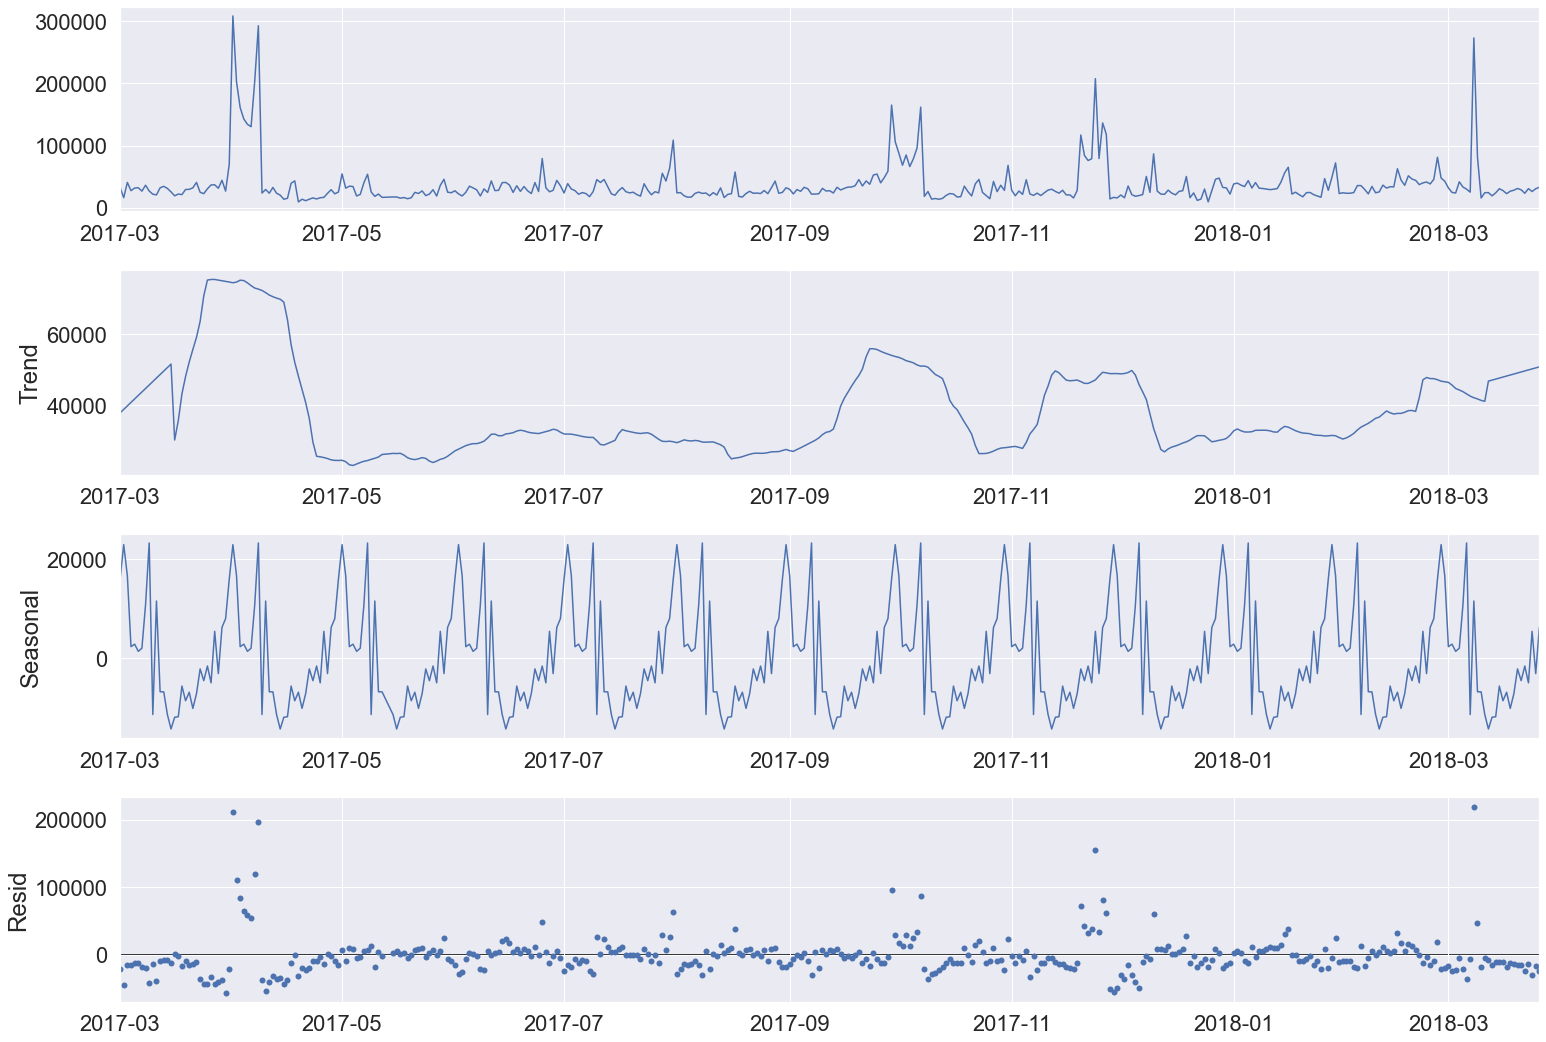

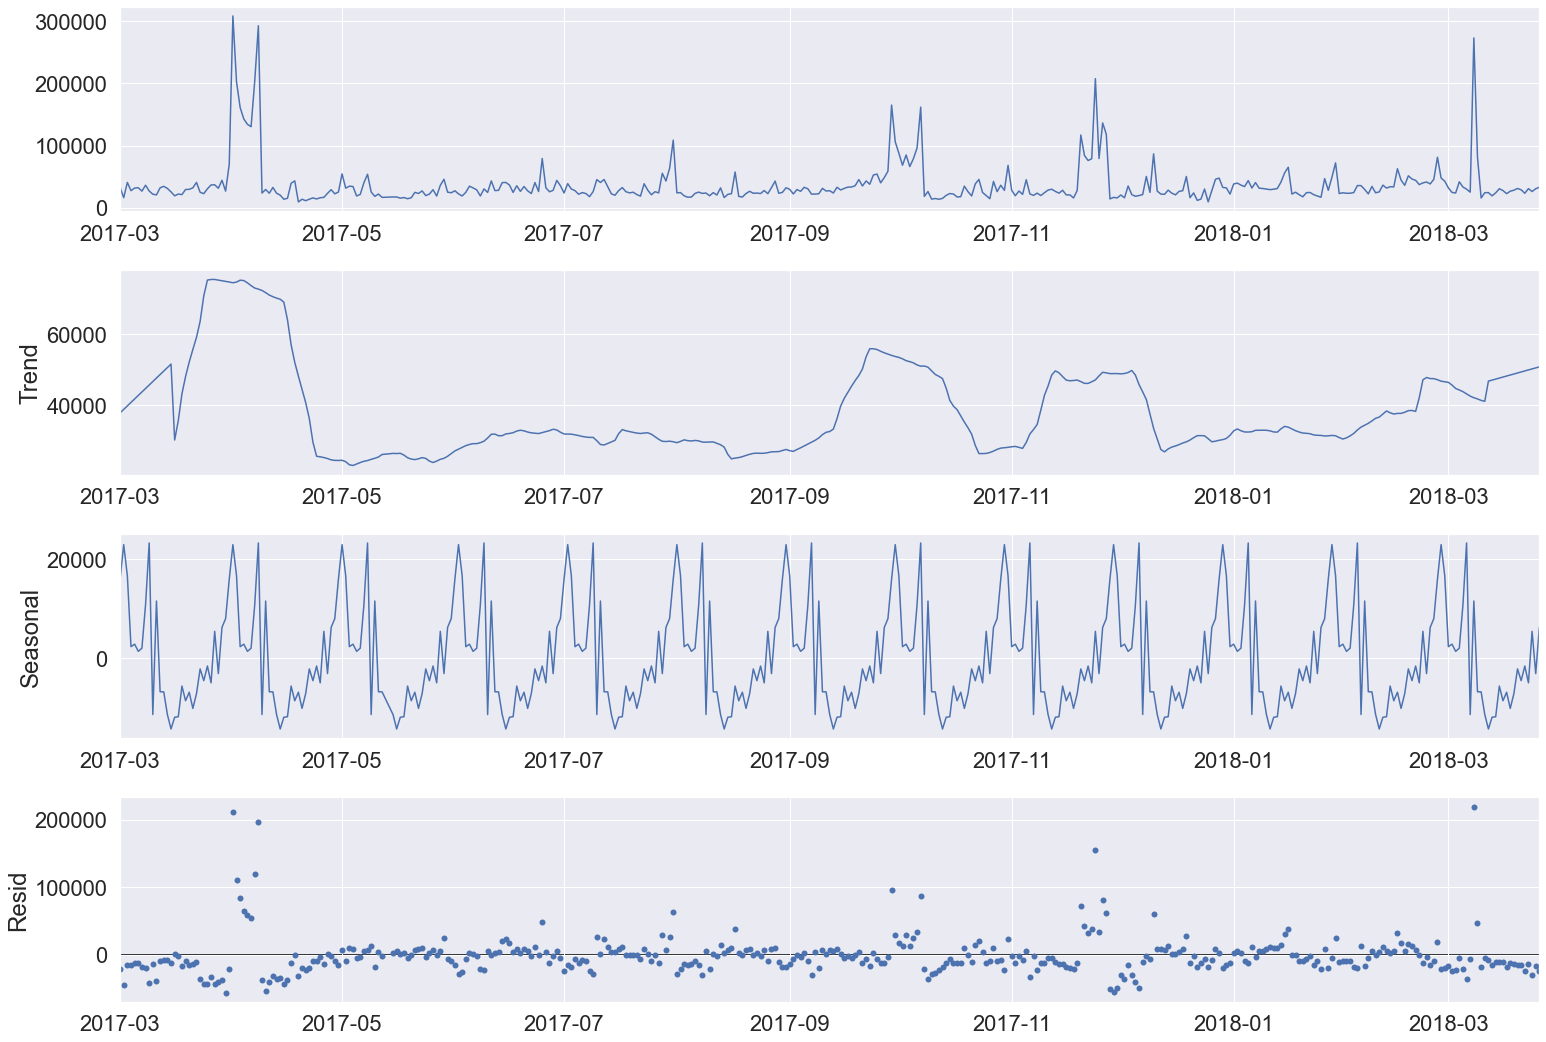

In [26]:
analysis = df.groupby(['Conv_Date'], as_index=False)['Revenue'].sum()
analysis.set_index('Conv_Date', inplace=True)
# applying decomposition
decompose_result_mult = seasonal_decompose(analysis, model="additive", extrapolate_trend='freq', period=30)
decompose_result_mult.plot()

Analisys without anomalies (+/- grather than 100,000)

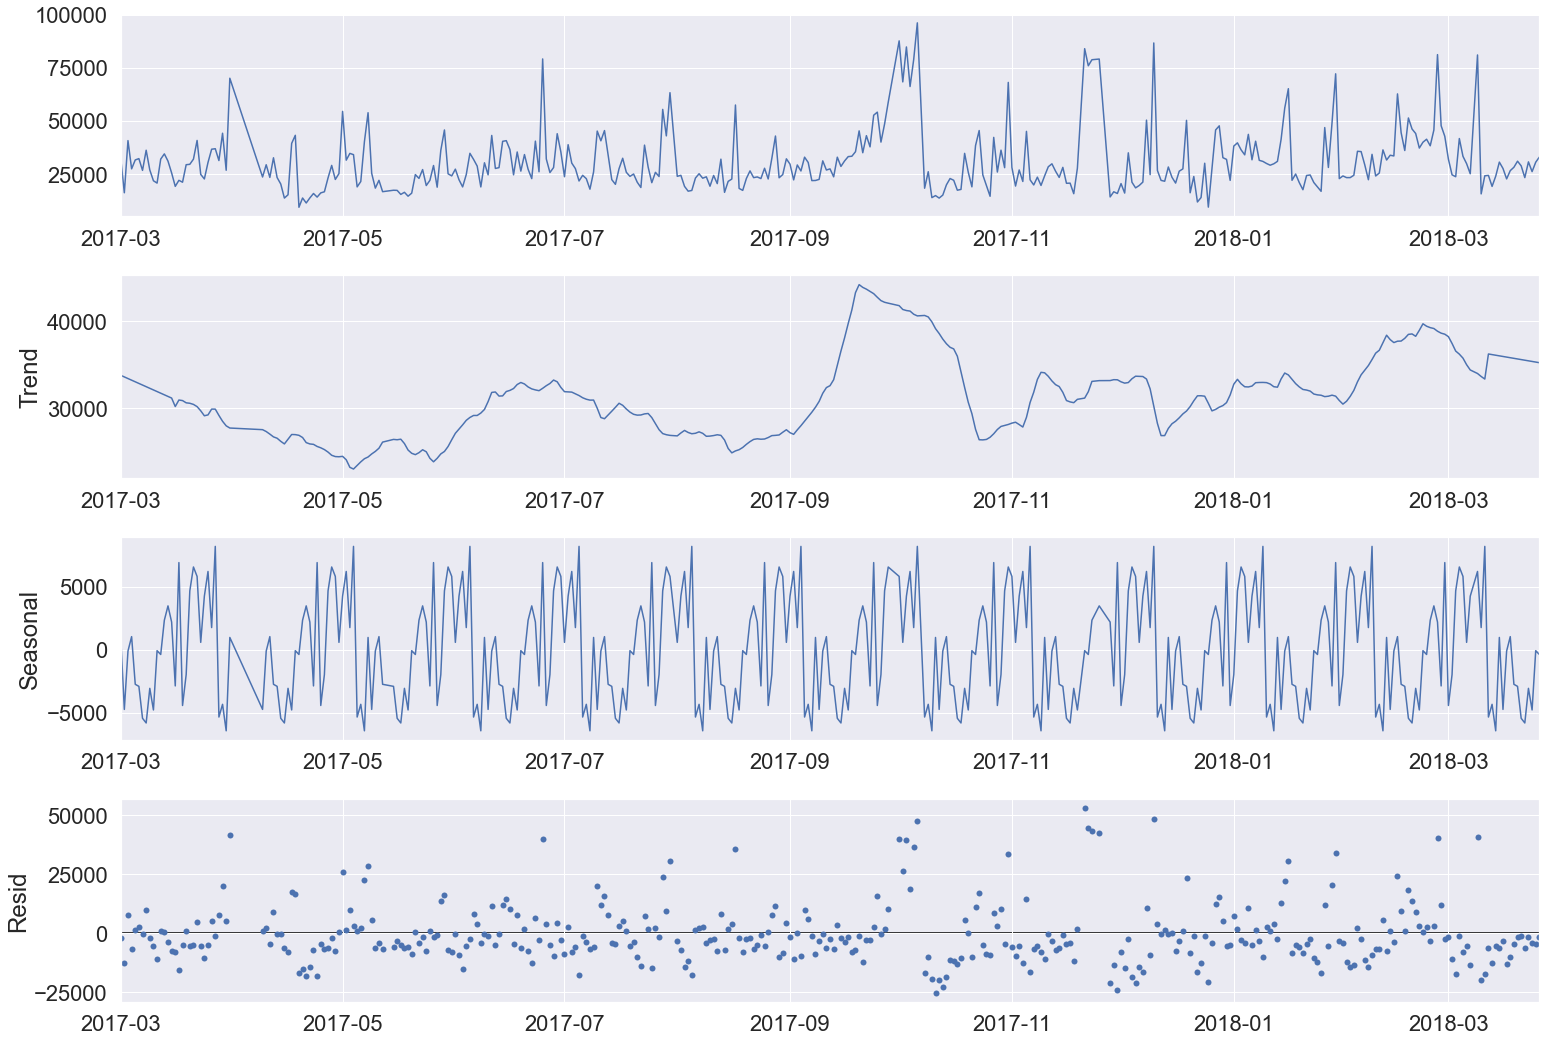

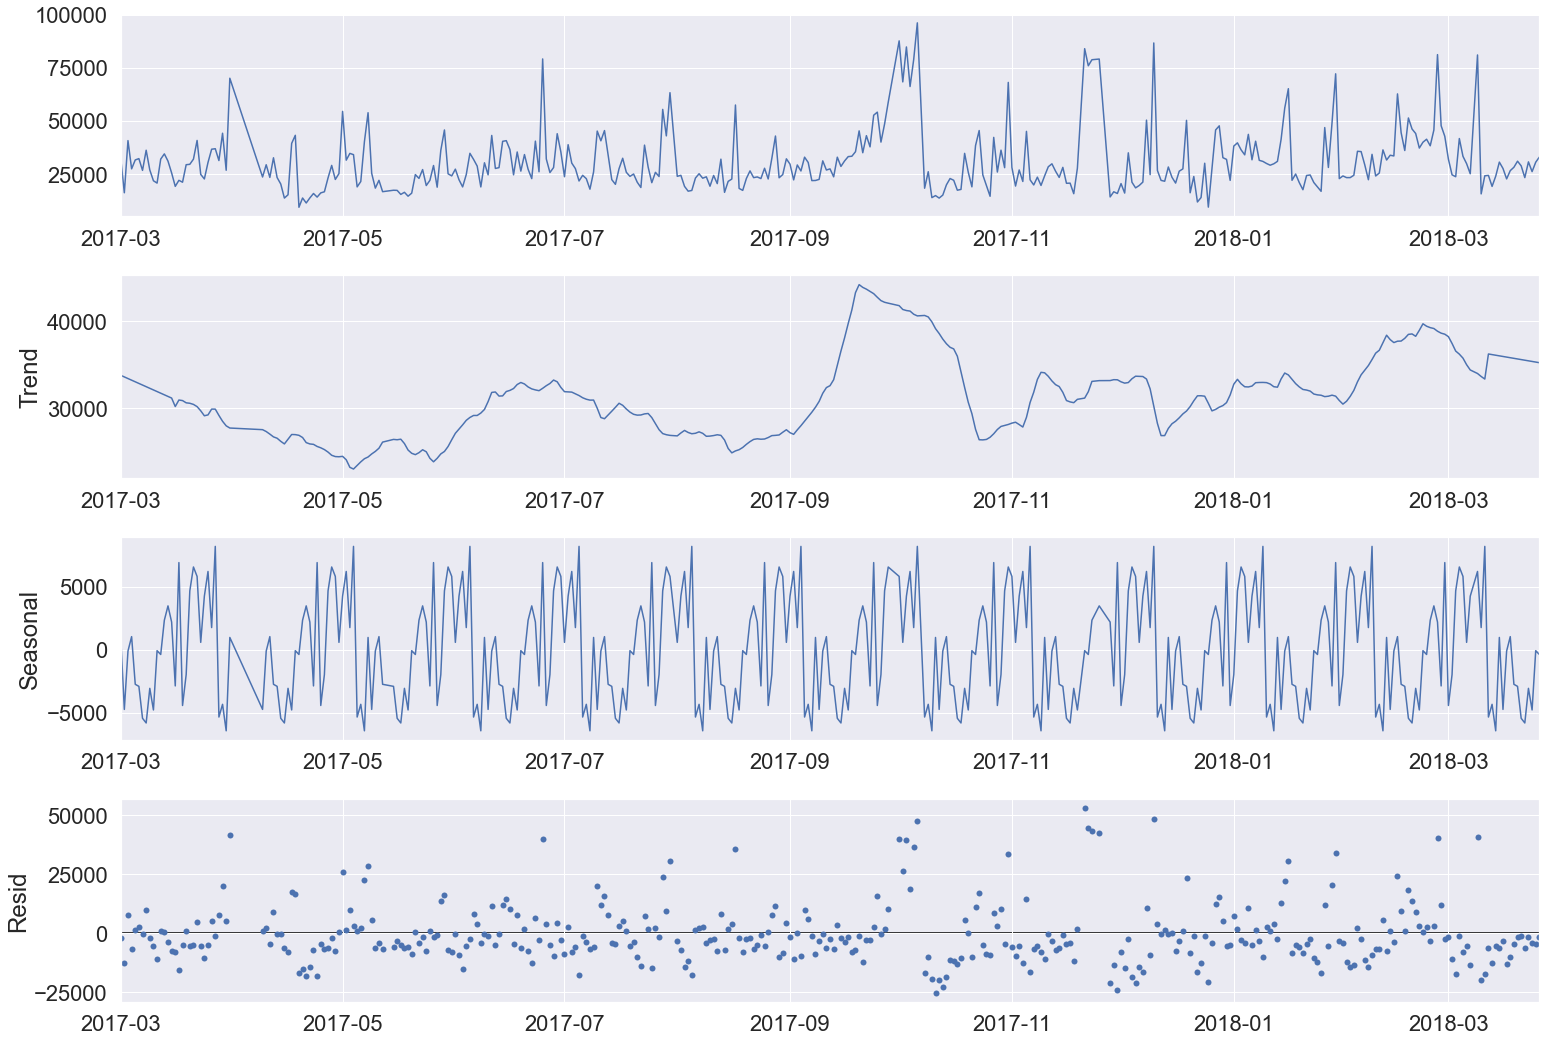

In [27]:
analysis = df.groupby(['Conv_Date'], as_index=False)['Revenue'].sum()
analysis.set_index('Conv_Date', inplace=True)

# remove anomalies
analysis = analysis[analysis['Revenue']<100000]

# Applying decomposition
decompose_result_mult = seasonal_decompose(analysis, model="additive", extrapolate_trend='freq', period=30)
decompose_result_mult.plot()

Here we can see a slight upward trend starting from 08/2017.

---

##### Data distribution and data anomaly

Column -> Revenue

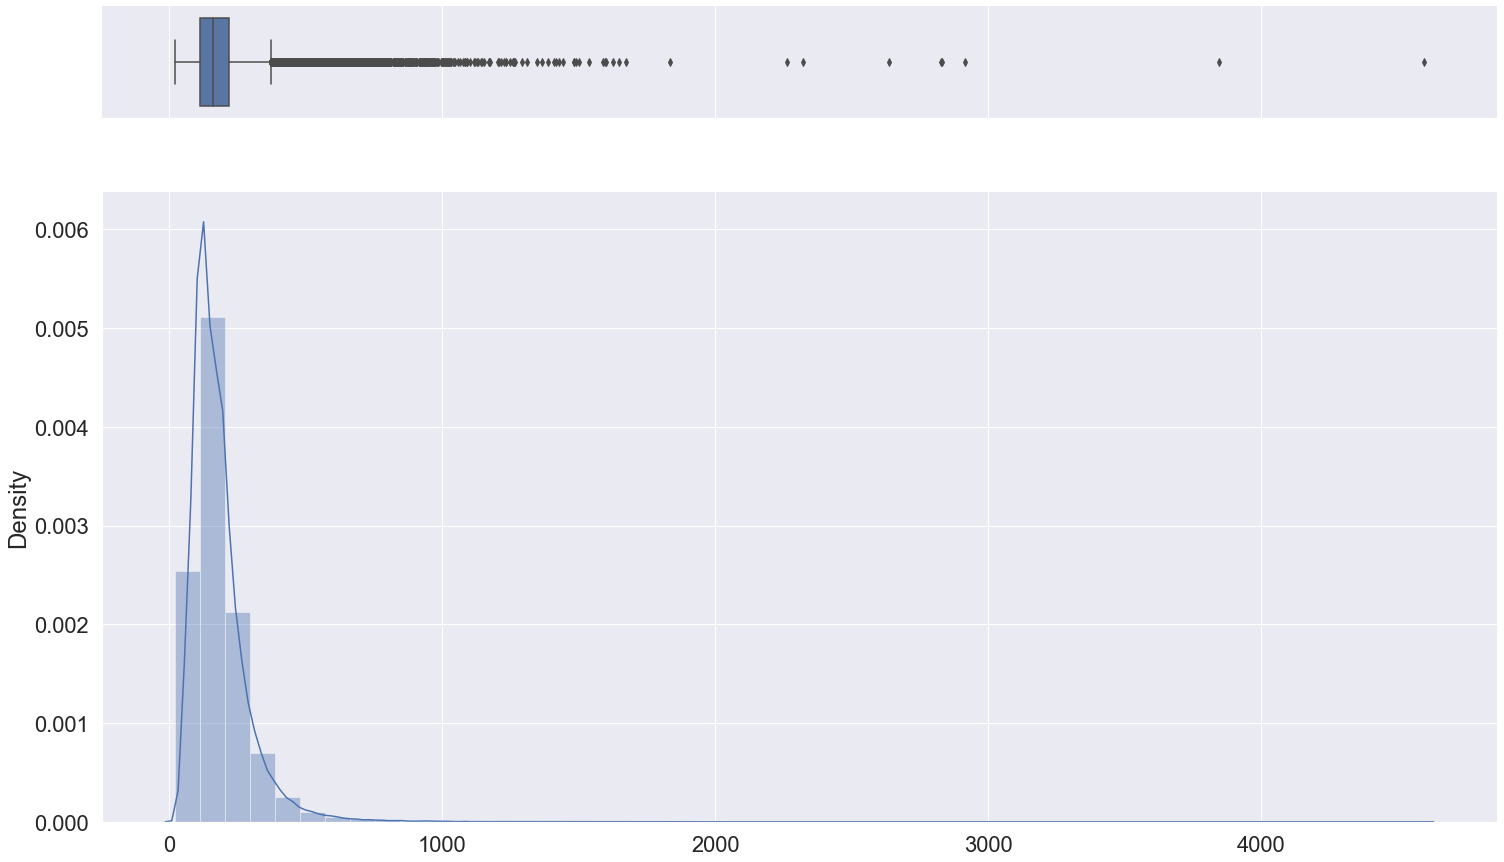

In [28]:
# Distribution of Revenue
x = df['Revenue'].values

f, (ax_box, ax_hist) = plt.subplots(2, 
                                    sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(25,15))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Through the distribution and boxplot we can see that there are some outliers. Before considering the total elimination of these, it is important to evaluate with the sales area if there is any explanation for the existence of these anomalies. If there is, it is important to make a decision together to eliminate or keep some outliers.

For this example we are going to try eliminate outliers. Before performing the elimination, we will analyze the percentage of lost data when applying this process, if it is greater than 10%, we will disregard the outlier elimination for this column. For this we will use the Inter Quartile Range (IQR) method.

In [29]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [30]:
column = 'Revenue'
df_outlier_removed = remove_outlier_IQR(df[column])
df_outlier_removed = pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)


# Checking if percentage of outlier are less than 10 %
if len(df_outlier_removed)*100/len(df) < 10:
    print(f"Quantity of outlier removed {len(df_outlier_removed)} represent {len(df_outlier_removed)*100/len(df)}% of the data")
    for i in range(0, len(ind_diff),1):
        df_final=df.drop([ind_diff[i]])
        df=df_final
        
    # Distribution of Revenue after drop outlier 
    x = df[column].values

    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)},
                                        figsize=(25,15))

    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
else:
    print(f"Quantity of outlier {len(df_outlier_removed)} represent {len(df_outlier_removed)*100/len(df)}% of the data. In this way we will not remove outliers for the column {column}")

Quantity of outlier 75769 represent 95.1692520253721% of the data. In this way we will not remove outliers for the column Revenue


---

##### Anomaly detection

Anomaly Detection is a technique used for identifying rare items, events, or observations that raise suspicions by differing significantly from the majority of the data.

This identification is important to evaluate the consistency of the data as well as to interpret eventual movements due to the application of promotions, campaigns and among others. For identify the outliers we use the Pycaret module.
Ref: https://pycaret.readthedocs.io/en/latest/index.html

Since algorithms cannot directly consume date or timestamp data, we will extract the features from the timestamp and will drop the actual timestamp column before training models.

In [31]:
#copy df
data = df.drop(columns=channels).copy(deep=True)
# set timestamp to index
data.set_index('Conv_Date', drop=True, inplace=True)
# resample timeseries to day 
data = data.resample('d').sum()
data.head()

,Revenue,day,day_of_year,week_of_year,is_weekday
Conv_Date,,,,,
2017-03-01,32614.1004,200,12000,1800,600
2017-03-02,16273.4062,166,5063,747,332
2017-03-03,40806.4726,627,12958,1881,1045
2017-03-04,27539.2884,616,9702,1386,924
2017-03-05,31716.4599,870,11136,1566,1218


In [32]:
# start to create a model using Pycaret
s = setup(data, silent=True,session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(391, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(391, 5)"
9,CPU Jobs,-1


In [33]:
# check list of available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [34]:
iforest = create_model('iforest', fraction = 0.1)
iforest_results = assign_model(iforest)
iforest_results.head()

,Revenue,day,day_of_year,week_of_year,is_weekday,Anomaly,Anomaly_Score
Conv_Date,,,,,,,
2017-03-01,32614.1004,200,12000,1800,600,0,-0.1205
2017-03-02,16273.4062,166,5063,747,332,0,-0.0756
2017-03-03,40806.4726,627,12958,1881,1045,0,-0.1035
2017-03-04,27539.2884,616,9702,1386,924,0,-0.1237
2017-03-05,31716.4599,870,11136,1566,1218,0,-0.1164


In [35]:
# check anomalies
iforest_results[iforest_results['Anomaly'] == 1].head()

,Revenue,day,day_of_year,week_of_year,is_weekday,Anomaly,Anomaly_Score
Conv_Date,,,,,,,
2017-04-01,308243.7354,1131,102921,14703,6786,1,0.2084
2017-04-02,202178.4805,1648,75808,10712,5768,1,0.1704
2017-04-03,161074.1189,2082,64542,9716,694,1,0.0610
2017-04-04,142665.5090,2340,54990,8190,1170,1,0.0100
2017-04-05,134134.6465,2750,52250,7700,1650,1,0.0068


In [149]:
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=iforest_results.index, y=column, title=f'{column} - Unsupervised Anomaly Detection') #template = 'plotly_dark'
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i][column] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))

fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  
        
fig.show()

With this, it is possible to evaluate each day with an anomalous Revenue value, in order to interpret the cause of that movement. After this interpretation, it is interesting to evaluate the deletion of those for which there is no explanation.

Obs: It may be interesting to evaluate other models for better identification of outliers due to the identification of some points that do not resemble an outlier.

---

##### Analisys of User_ID

Number of customers:

In [37]:
# quantity of User_ID
len(df['User_ID'].unique())

55333

In [38]:
# Analisys of quantity of users per day
fig = px.line(df.groupby(['Conv_Date'], as_index=False)['User_ID'].nunique(), x="Conv_Date", y="User_ID")

fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  
fig.show()

In [39]:
# Analisys of quantity of users per month
df_year_month = df.groupby(['year_month'], as_index=False)['User_ID'].nunique()
df_year_month['year_month'] = df_year_month['year_month'].astype(str)

In [40]:
# Analisys of quantity of users per month
fig = px.line(df_year_month, x="year_month", y="User_ID")

fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  

fig.show()

Here we can see peaks similar to those on the Revenue graph per day and these are in the same periods. This is an indication that the increase in the number of customers impacted on the increase in Revenue.

##### Monthly recurring customer by Cohort Analysis

Now we shall make a function to get the month number of each invoice number so that we can know on which month the product got purchased.

In [41]:
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)
df['Conv_Month'] = df['Conv_Date'].apply(get_month) 
df.head()

,Conv_Date,Revenue,User_ID,Conv_ID,A,B,C,D,E,F,...,T,U,V,day,year_month,day_name,day_of_year,week_of_year,is_weekday,Conv_Month
0,2017-03-06,47.0000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,6,2017-03,Monday,65,10,1,2017-03-01
1,2017-03-02,98.0000,unidentified,faf5c1181ea84a32237dff45ca201d2c28f19d7b,0.3228,0.0000,0.0000,0.0000,0.3769,0.0000,...,0.0000,0.0000,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01
2,2017-03-02,180.3530,unidentified,b0e58a88459ece1b585ca22c93e633dc56273b83,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01
3,2017-03-23,201.9410,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,0.5733,0.0249,0.0000,0.0000,0.0210,0.0000,...,0.0000,0.0000,0.0000,23,2017-03,Thursday,82,12,4,2017-03-01
4,2017-03-03,197.4701,unidentified,966568c7c859480c79b212520d20a51e735fd735,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,3,2017-03,Friday,62,9,5,2017-03-01


In [42]:
grouping = df.groupby('User_ID')['Conv_Month']
grouping.head()

0       2017-03-01
1       2017-03-01
2       2017-03-01
3       2017-03-01
4       2017-03-01
           ...    
79638   2018-03-01
79639   2018-03-01
79640   2018-03-01
79641   2018-03-01
79642   2018-03-01
Name: Conv_Month, Length: 73640, dtype: datetime64[ns]

Now let’s see on which month each individual customer made their first purchase.

In [43]:
df['CohortMonth'] = grouping.transform('min')
df.head()

,Conv_Date,Revenue,User_ID,Conv_ID,A,B,C,D,E,F,...,U,V,day,year_month,day_name,day_of_year,week_of_year,is_weekday,Conv_Month,CohortMonth
0,2017-03-06,47.0000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,6,2017-03,Monday,65,10,1,2017-03-01,2017-03-01
1,2017-03-02,98.0000,unidentified,faf5c1181ea84a32237dff45ca201d2c28f19d7b,0.3228,0.0000,0.0000,0.0000,0.3769,0.0000,...,0.0000,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01,2017-03-01
2,2017-03-02,180.3530,unidentified,b0e58a88459ece1b585ca22c93e633dc56273b83,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01,2017-03-01
3,2017-03-23,201.9410,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,0.5733,0.0249,0.0000,0.0000,0.0210,0.0000,...,0.0000,0.0000,23,2017-03,Thursday,82,12,4,2017-03-01,2017-03-01
4,2017-03-03,197.4701,unidentified,966568c7c859480c79b212520d20a51e735fd735,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,3,2017-03,Friday,62,9,5,2017-03-01,2017-03-01


Now this ‘CohortMonth’ is the time when the customers made their first purchase. Now we shall again make a function to extract on which months the customers came by so that we can get our recurring customers.

In [44]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

Invoice_Year, Invoice_Month, _ = get_date_int(df, 'Conv_Month')
Cohort_Year, Cohort_Month , _ = get_date_int(df, 'CohortMonth')

Year_Diff = Invoice_Year - Cohort_Year
Month_Diff = Invoice_Month - Cohort_Month

df['CohortIndex'] = Year_Diff*12 + Month_Diff +1
df.head()

,Conv_Date,Revenue,User_ID,Conv_ID,A,B,C,D,E,F,...,V,day,year_month,day_name,day_of_year,week_of_year,is_weekday,Conv_Month,CohortMonth,CohortIndex
0,2017-03-06,47.0000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,6,2017-03,Monday,65,10,1,2017-03-01,2017-03-01,1
1,2017-03-02,98.0000,unidentified,faf5c1181ea84a32237dff45ca201d2c28f19d7b,0.3228,0.0000,0.0000,0.0000,0.3769,0.0000,...,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01,2017-03-01,1
2,2017-03-02,180.3530,unidentified,b0e58a88459ece1b585ca22c93e633dc56273b83,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01,2017-03-01,1
3,2017-03-23,201.9410,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,0.5733,0.0249,0.0000,0.0000,0.0210,0.0000,...,0.0000,23,2017-03,Thursday,82,12,4,2017-03-01,2017-03-01,1
4,2017-03-03,197.4701,unidentified,966568c7c859480c79b212520d20a51e735fd735,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,3,2017-03,Friday,62,9,5,2017-03-01,2017-03-01,1


Now let’s ‘groupby’ the customers by ‘CohortMonth’ and ‘CohortIndex’ so that we can identify the customers who came to purchase in the same month with the same interval.

In [45]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
grouping.head()

,Conv_Date,Revenue,User_ID,Conv_ID,A,B,C,D,E,F,...,V,day,year_month,day_name,day_of_year,week_of_year,is_weekday,Conv_Month,CohortMonth,CohortIndex
0,2017-03-06,47.0000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,6,2017-03,Monday,65,10,1,2017-03-01,2017-03-01,1
1,2017-03-02,98.0000,unidentified,faf5c1181ea84a32237dff45ca201d2c28f19d7b,0.3228,0.0000,0.0000,0.0000,0.3769,0.0000,...,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01,2017-03-01,1
2,2017-03-02,180.3530,unidentified,b0e58a88459ece1b585ca22c93e633dc56273b83,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,2,2017-03,Thursday,61,9,4,2017-03-01,2017-03-01,1
3,2017-03-23,201.9410,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1,0.5733,0.0249,0.0000,0.0000,0.0210,0.0000,...,0.0000,23,2017-03,Thursday,82,12,4,2017-03-01,2017-03-01,1
4,2017-03-03,197.4701,unidentified,966568c7c859480c79b212520d20a51e735fd735,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,3,2017-03,Friday,62,9,5,2017-03-01,2017-03-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74427,2018-03-04,183.5280,71a5dca7ae1a136e8dbd4d1538c61f697a68723d,08f3f1d7ce680f59744e64eaa0344c4a6a091a90,0.3728,0.0000,0.0000,0.0000,0.0000,0.4672,...,0.0000,4,2018-03,Sunday,63,9,7,2018-03-01,2017-07-01,9
74447,2018-03-04,128.9840,48f5b3233f0ce95d634a0af62204fceeec70e410,60ae6835b4947f6d888f16f90e53090b007c80c5,0.2006,0.0738,0.0649,0.0000,0.4210,0.0000,...,0.0000,4,2018-03,Sunday,63,9,7,2018-03-01,2018-01-01,3
74481,2018-03-04,324.8000,4c449511d1b4ed24c5fcbd19f94651a4e719ba4d,2f9fe0b9287978e9a89a5ecfdc9972295ad50721,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,4,2018-03,Sunday,63,9,7,2018-03-01,2017-05-01,11
74486,2018-03-04,134.1920,d4ee70ee4a3892a52ea24536ac23a47cbfe2903a,48fa1e02199bb3d52c6b588b4a352e03554acd0c,0.6113,0.0000,0.3004,0.0000,0.0884,0.0000,...,0.0000,4,2018-03,Sunday,63,9,7,2018-03-01,2017-11-01,5


Now we shall take only the first month of each customer to calculate a pivot table so that we can calculate later the recurring customers.

In [46]:
cohort_data = grouping['User_ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,User_ID
0,2017-03-01,1,4443
1,2017-03-01,2,1046
2,2017-03-01,3,636
3,2017-03-01,4,568
4,2017-03-01,5,541


In [47]:
cohort_counts = cohort_data.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="User_ID")
retention = cohort_counts
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2017-03-01,4443.0000,1046.0000,636.0000,568.0000,541.0000,393.0000,517.0000,469.0000,497.0000,318.0000,331.0000,304.0000,278.0000
2017-04-01,7263.0000,573.0000,594.0000,676.0000,404.0000,721.0000,778.0000,631.0000,334.0000,426.0000,338.0000,354.0000,NaN
2017-05-01,3188.0000,187.0000,218.0000,161.0000,218.0000,208.0000,188.0000,134.0000,101.0000,126.0000,89.0000,NaN,NaN
2017-06-01,3791.0000,182.0000,137.0000,152.0000,153.0000,165.0000,82.0000,96.0000,89.0000,68.0000,NaN,NaN,NaN
2017-07-01,4058.0000,124.0000,130.0000,117.0000,137.0000,63.0000,85.0000,65.0000,70.0000,NaN,NaN,NaN,NaN
2017-08-01,3387.0000,147.0000,120.0000,109.0000,52.0000,59.0000,58.0000,53.0000,NaN,NaN,NaN,NaN,NaN
2017-09-01,4517.0000,132.0000,147.0000,79.0000,93.0000,73.0000,62.0000,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,4449.0000,138.0000,61.0000,59.0000,53.0000,63.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,5171.0000,81.0000,59.0000,52.0000,65.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So the first index value has the recurring customers of each 13 months, but the next index 2017–04–01 has only 12 months difference from 2018–03–01. That’s why the last row value is NaN. So in the first month, 4443 customers came to purchase from which 1046 customers returned to buy again in the next month and, it goes on.

Now we shall take the number of customers that came in each month. Because we want to keep them as a base and the later came by customers will be followers.

In [48]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

CohortMonth
2017-03-01   4443.0000
2017-04-01   7263.0000
2017-05-01   3188.0000
2017-06-01   3791.0000
2017-07-01   4058.0000
Name: 1, dtype: float64

Now we will reshape the data in the interval of 1–0 so that we can show a percentage of recurring customers.

In [49]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2017-03-01,1.0000,0.2354,0.1431,0.1278,0.1218,0.0885,0.1164,0.1056,0.1119,0.0716,0.0745,0.0684,0.0626
2017-04-01,1.0000,0.0789,0.0818,0.0931,0.0556,0.0993,0.1071,0.0869,0.0460,0.0587,0.0465,0.0487,NaN
2017-05-01,1.0000,0.0587,0.0684,0.0505,0.0684,0.0652,0.0590,0.0420,0.0317,0.0395,0.0279,NaN,NaN
2017-06-01,1.0000,0.0480,0.0361,0.0401,0.0404,0.0435,0.0216,0.0253,0.0235,0.0179,NaN,NaN,NaN
2017-07-01,1.0000,0.0306,0.0320,0.0288,0.0338,0.0155,0.0209,0.0160,0.0172,NaN,NaN,NaN,NaN


So we have converted the retention rate in percentage. Now let’s plot this in a heatmap to observe our monthly recurring customer percentage.

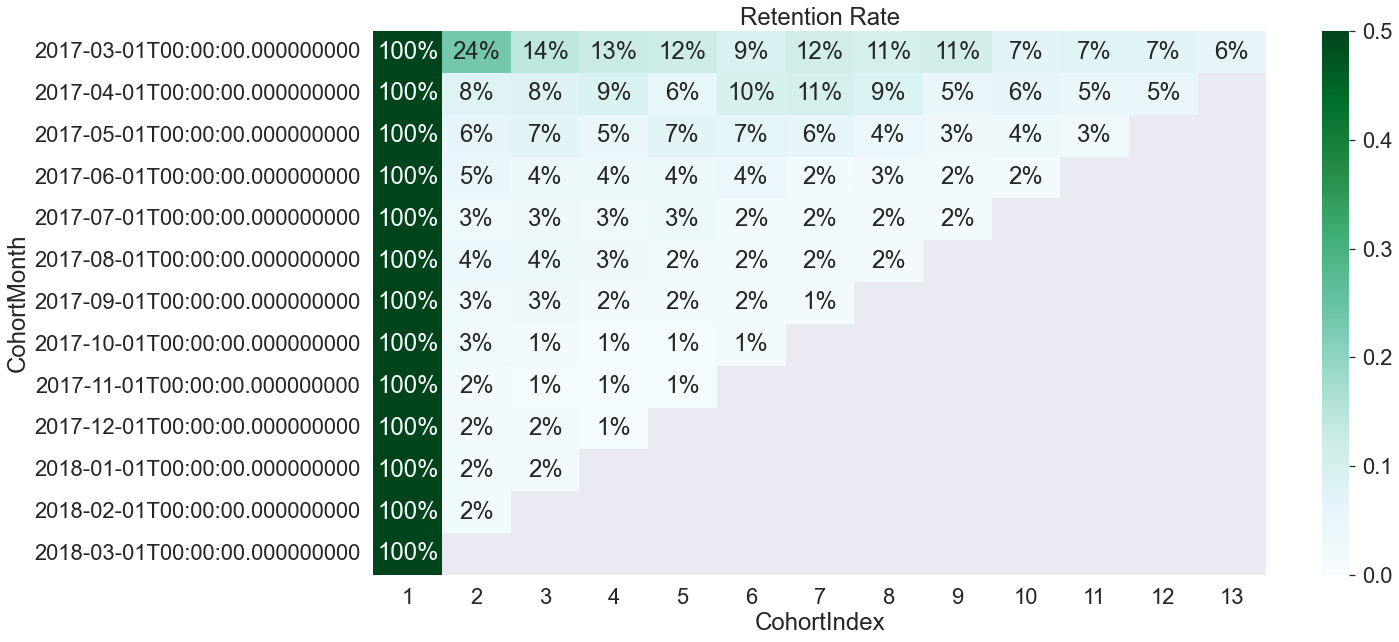

In [50]:
plt.figure(figsize=(20,10))
plt.title("Retention Rate")
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="BuGn")
plt.show()

---

##### Analisys of Channel

Daily

In [51]:
day_evolution_channels = df.groupby(['Conv_Date'], as_index=False)[channels].sum()

for idx,i in enumerate(channels):
    if idx == 0:
        fig = px.line(day_evolution_channels, x="Conv_Date", y=i, labels=i)
        fig.add_scatter(x=day_evolution_channels["Conv_Date"], y=day_evolution_channels[i], name=i, mode='lines')
    else:    
        fig.add_scatter(x=day_evolution_channels["Conv_Date"], y=day_evolution_channels[i], name=i, mode='lines')
        
fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  
  
fig.show()


Here we can see which channels most influenced each day in the analyzed period. Another important point is the identification of the channels that motivated the atypical movements in Revenue and number of customers.

Monthly

In [52]:
day_evolution_channels = df.groupby(['year_month'], as_index=False)[channels].sum()
day_evolution_channels['year_month'] = day_evolution_channels['year_month'].astype(str)

for idx,i in enumerate(channels):
    if idx == 0:
        fig = px.line(day_evolution_channels, x="year_month", y=i, labels=i)
        fig.add_scatter(x=day_evolution_channels["year_month"], y=day_evolution_channels[i], name=i, mode='lines')
    else:    
        fig.add_scatter(x=day_evolution_channels["year_month"], y=day_evolution_channels[i], name=i, mode='lines')
        
fig.update_layout(
    autosize=False,
    width=2500,
    height=1000,
    font=dict(
            size=20,
            color='#000000'
        ))  
  
fig.show()

With this monthly analysis we can identify which channels had the greatest impact over time. As can be seen, channels `A, G, H, I, B, E` had a significant impact over time.

<AxesSubplot:xlabel='Channel'>

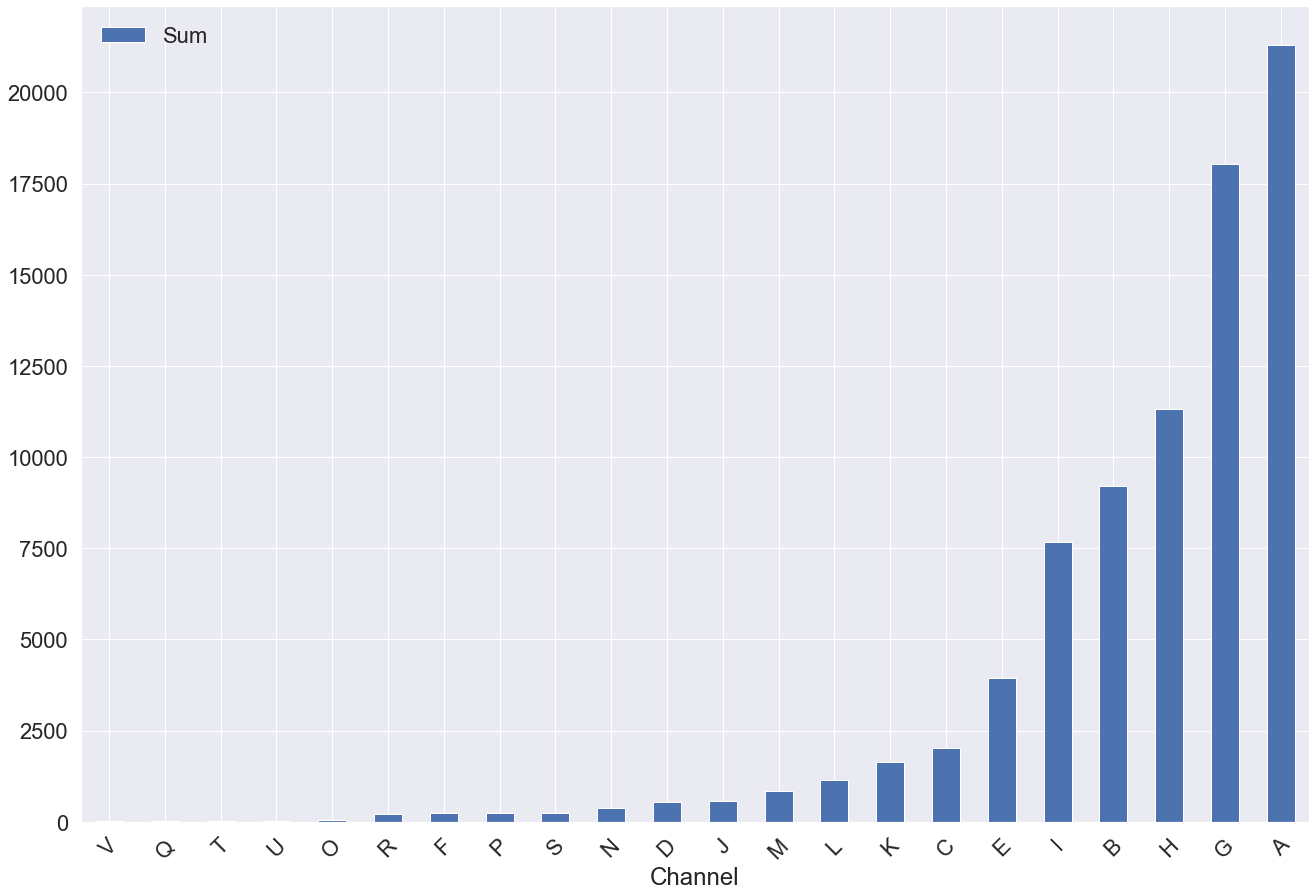

In [53]:
total_channels = day_evolution_channels[channels].sum(axis=0).reset_index()
total_channels.rename(columns={'index':'Channel',0:'Sum'}, inplace=True)

total_channels = total_channels.sort_values(by='Sum').reset_index(drop=True)

total_channels.plot.bar(x='Channel', y='Sum', rot=45)

Here we can see the most influential channels for conversions over the entire period of analysis.

---

##### Checking the relationships between variables.

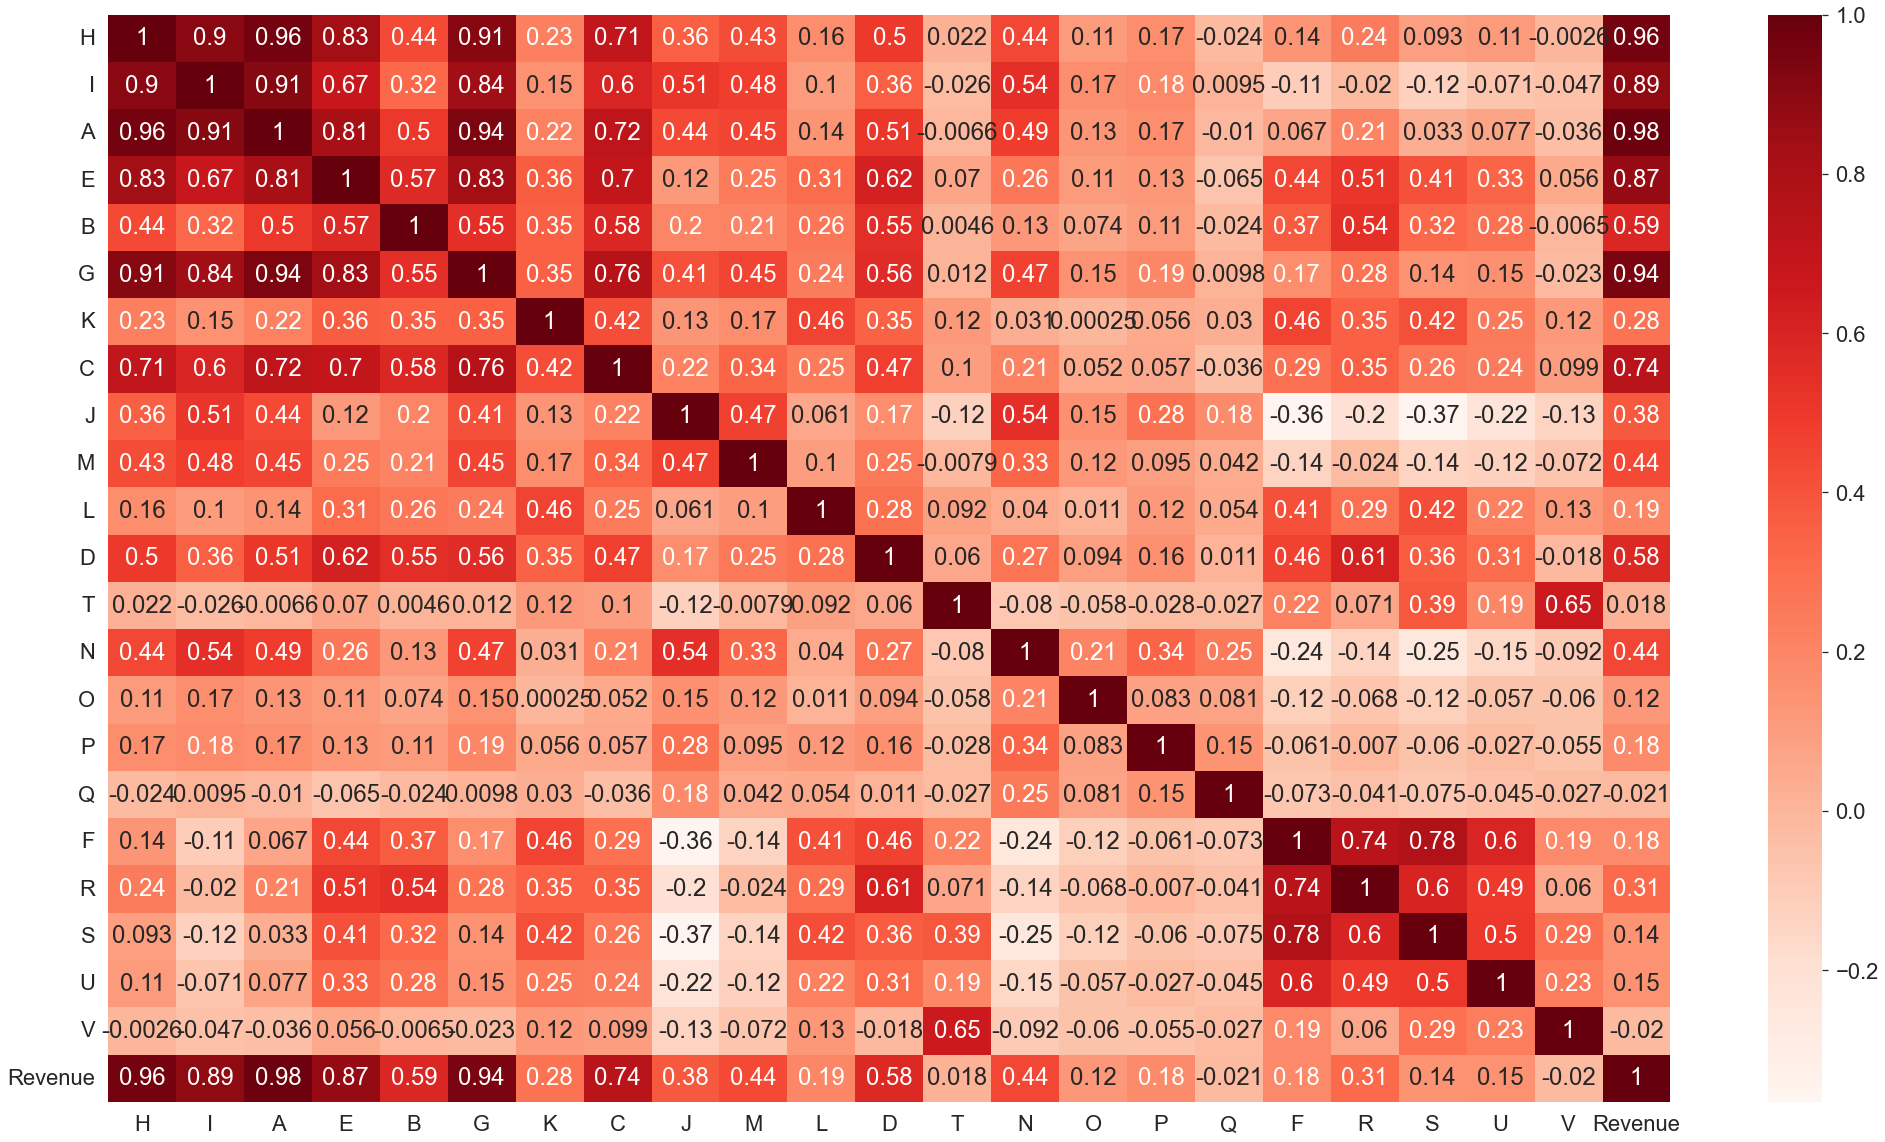

In [54]:
aggregations ={}
for i in channels:
    aggregations[i] = 'sum'
    
aggregations['Revenue'] = 'sum'


df_day =  df.groupby(['Conv_Date'], as_index=False).agg(aggregations)

plt.figure(figsize=(35,20))
#plot the correlation matrix
sns.heatmap(df_day.corr(), annot=True, cmap = 'Reds')
plt.show()

Here we can see that some channels have an impact on the increase in Revenue.

---

##### Segmentation of User_ID

Customer segmentation is important for businesses to understand their target audience. Different advertisements can be curated and sent to different audience segments based on their demographic profile, interests, and affluence level.

There are many unsupervised machine learning algorithms that can help companies identify their user base and create consumer segments.

We will be looking at a popular unsupervised learning technique called K-Means clustering.

This algorithm can take in unlabelled customer data and assign each data point to clusters.

The goal of K-Means is to group all the data available into non-overlapping sub-groups that are distinct from each other.

First, lets standardize all variables in the dataset to get them around the same scale.

In [91]:
aggregations ={}
for i in channels:
    aggregations[i] = 'mean'
    
aggregations['Revenue'] = 'sum'

aggregations['day'] = 'count'
df_clients = df.groupby(['User_ID']).agg(aggregations)
df_clients.rename(columns={'day':'count_purchase'}, inplace=True)
df_clients

,H,I,A,E,B,G,K,C,J,M,...,O,P,Q,F,R,S,U,V,Revenue,count_purchase
User_ID,,,,,,,,,,,,,,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,0.1700,0.0000,0.3029,0.0000,0.0000,0.1553,0.3717,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,153.8400,1
0003509d64606735e66a3d32f2a1a084f613ee4b,0.0000,0.5000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,245.6320,2
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,0.3191,0.0000,0.1157,0.1520,0.0000,0.2803,0.0000,0.0000,0.1329,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,833.1640,2
0003f10010cd3dadcb7182ed7b0abf5166393e91,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,121.8080,1
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,108.7200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc3a37495e0f44dbfe4511ec0d46460aa571e5,0.3369,0.3000,0.0000,0.0000,0.0000,0.3631,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,148.1440,1
fffc95150d63e98e62d98cdfabbf13245fdc2dd2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,210.8000,1
fffe1f896de2470b64ae4895249f0a516f38e0db,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84.6280,1


Here we can see that there are unidentified `unidentified` clients, these can get in the way of modeling. So let's remove them.

In [118]:
df_clients = df_clients.query("User_ID!='unidentified'")
df_clients

,H,I,A,E,B,G,K,C,J,M,...,O,P,Q,F,R,S,U,V,Revenue,count_purchase
User_ID,,,,,,,,,,,,,,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,0.1700,0.0000,0.3029,0.0000,0.0000,0.1553,0.3717,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,153.8400,1
0003509d64606735e66a3d32f2a1a084f613ee4b,0.0000,0.5000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,245.6320,2
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,0.3191,0.0000,0.1157,0.1520,0.0000,0.2803,0.0000,0.0000,0.1329,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,833.1640,2
0003f10010cd3dadcb7182ed7b0abf5166393e91,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,121.8080,1
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,108.7200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb0fc0e6cde8d4838713679c0a6d3c28087671,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,97.3360,1
fffc3a37495e0f44dbfe4511ec0d46460aa571e5,0.3369,0.3000,0.0000,0.0000,0.0000,0.3631,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,148.1440,1
fffc95150d63e98e62d98cdfabbf13245fdc2dd2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,210.8000,1


In [119]:
col_names = ['Revenue','count_purchase'] + ['A', 'G', 'H', 'I', 'B', 'E']#channels
features = df_clients[col_names]
scaler = sklearn.preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Revenue,count_purchase,A,G,H,I,B,E
0,-0.2902,-0.2894,0.1879,-0.2308,0.0691,-0.4503,-0.4241,-0.2953
1,-0.0254,0.4389,-0.7077,0.7511,-0.5134,1.7852,-0.4241,-0.2953
2,1.6698,0.4389,-0.3656,0.1254,0.5799,-0.4503,-0.4241,0.5772
3,-0.3827,-0.2894,-0.7077,2.1753,-0.5134,-0.4503,-0.4241,-0.2953
4,-0.4204,-0.2894,2.2490,-0.6732,-0.5134,-0.4503,-0.4241,-0.2953


The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for . If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

Ref: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

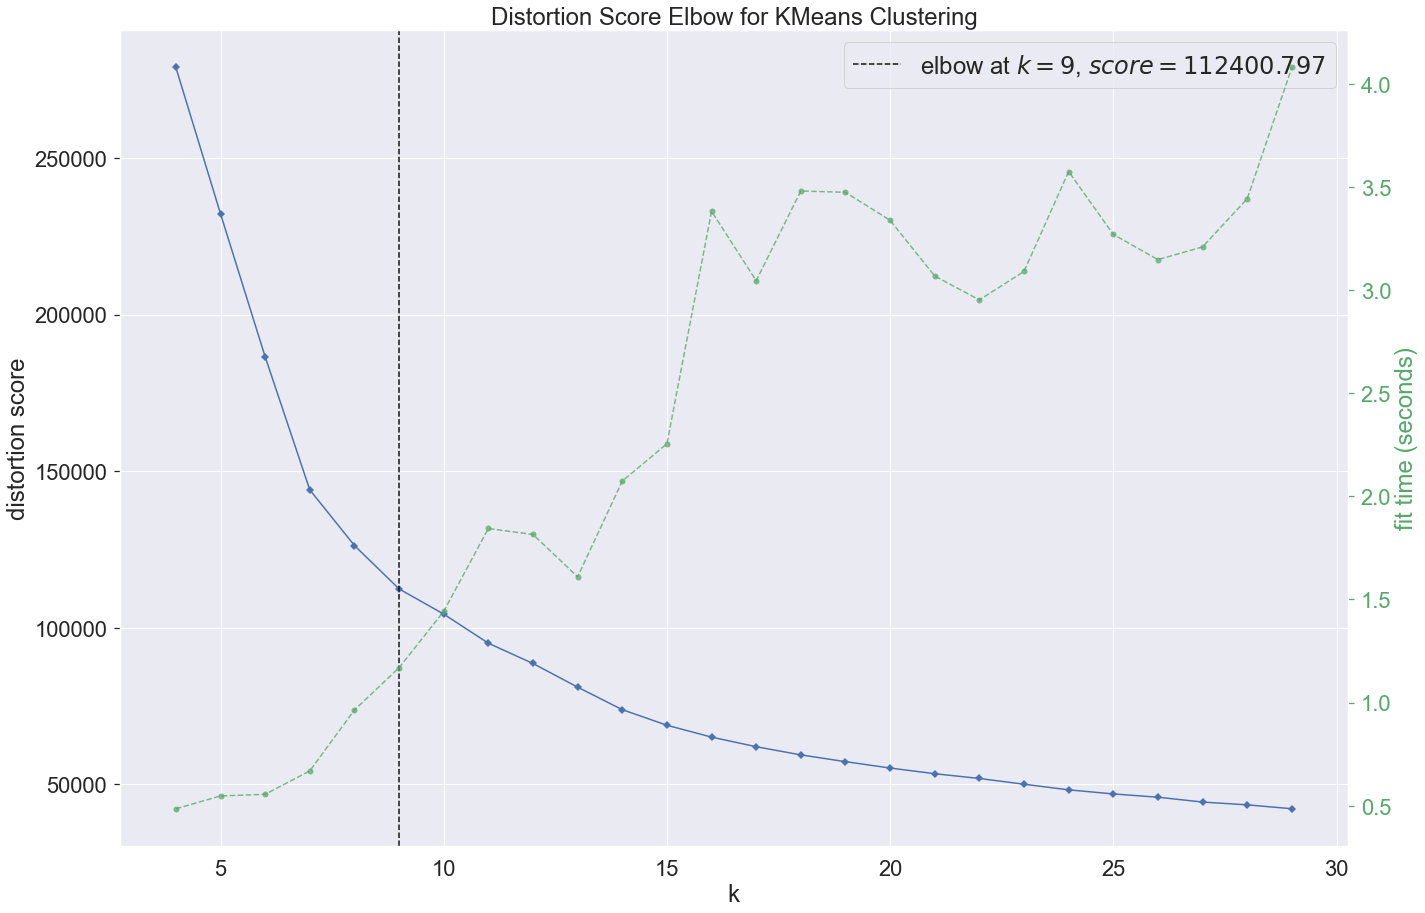

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
kmeans = sklearn.cluster.KMeans(n_jobs = -1, init='k-means++',random_state=1)

visualizer = KElbowVisualizer(kmeans, k=(4,30))

visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

As we can see, the best number of cluster according to the “elbow” method is 9.

A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.

Lets calculate the silhouette score of the model we just built:

In [121]:
# First, build a model with 9 clusters

kmeans = sklearn.cluster.KMeans(n_jobs = -1, n_clusters = 9, init='k-means++',random_state=1)
kmeans.fit(scaled_features)

# Now, print the silhouette score of this model

print(sklearn.metrics.silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4201843313975723


We can do better and try getting higher cluster separation. For this, lets do some feature selection.

We can use a technique called Principal Component Analysis (PCA).

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.

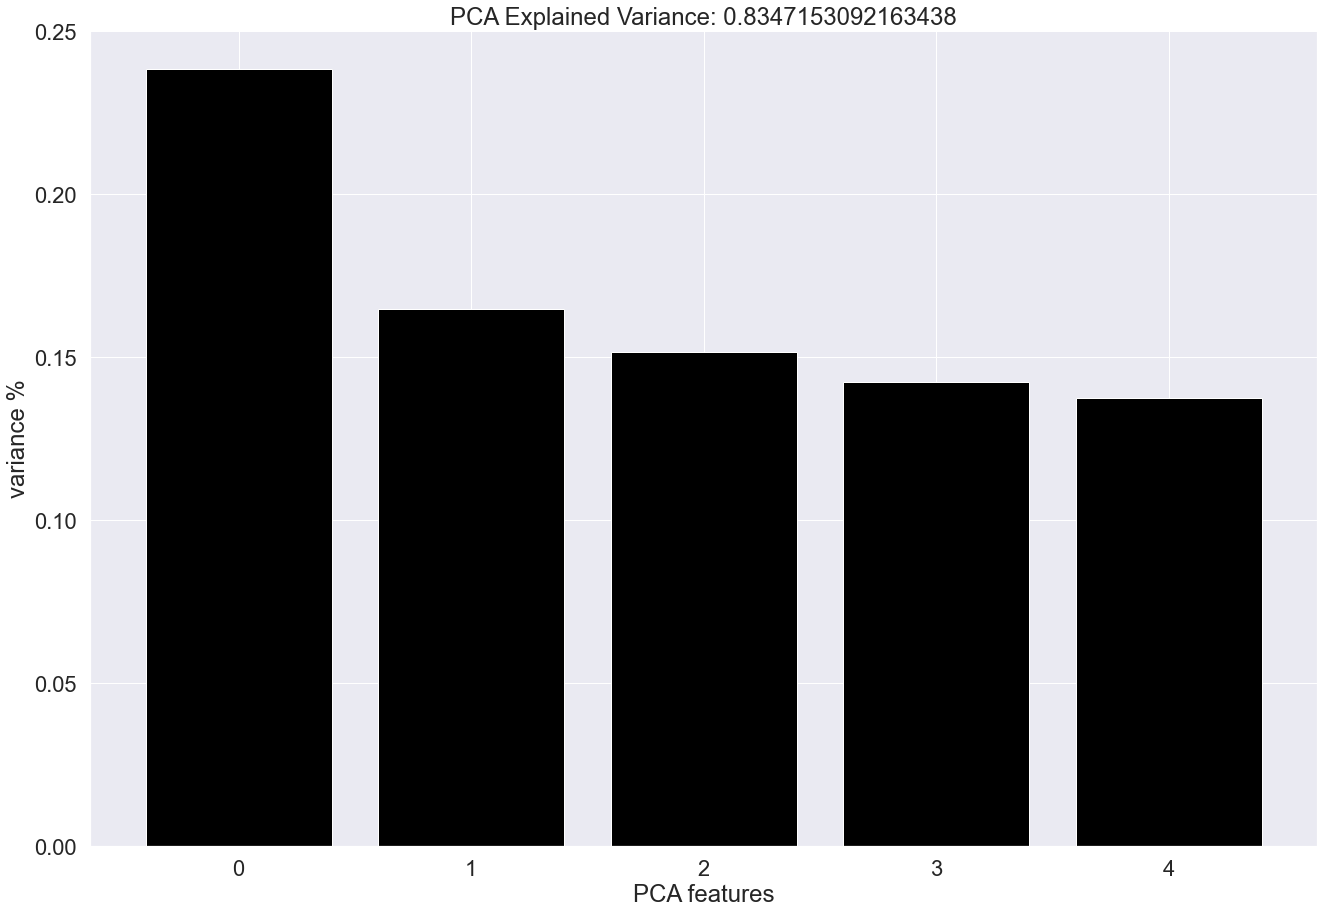

In [122]:
pca = sklearn.decomposition.PCA(n_components=5,random_state=1)
principalComponents = pca.fit_transform(scaled_features)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.title(f'PCA Explained Variance: {sum(pca.explained_variance_ratio_)}')

PCA_components = pd.DataFrame(principalComponents)

Based on this visualization, we can see that the first two PCA components explain around 83% of the dataset variance.

We can feed these two components into the model.

Lets build the model again with the first four principal components, and decide on the number of clusters to use:

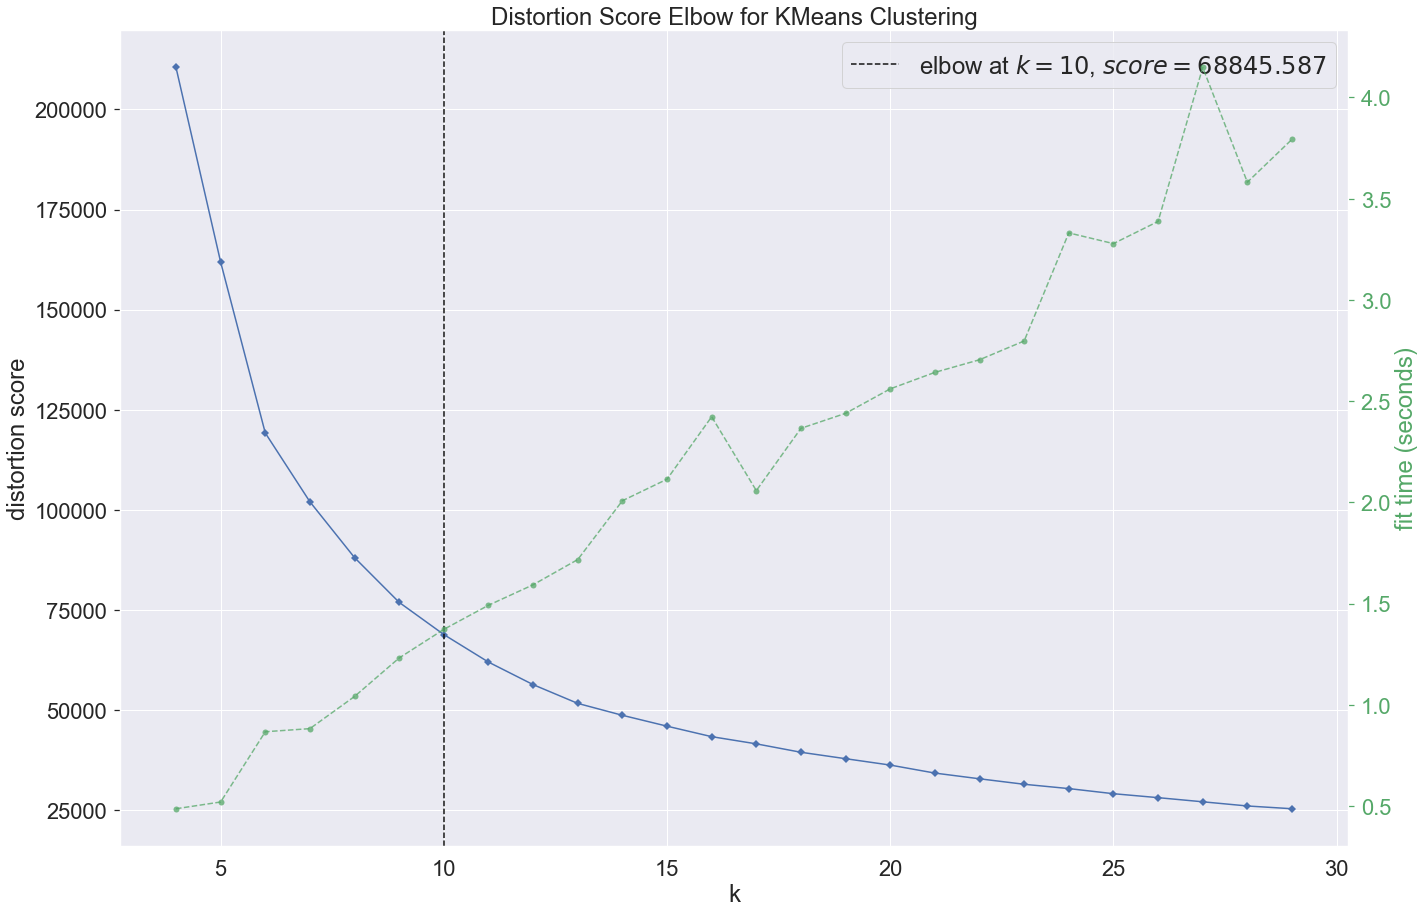

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
kmeans = sklearn.cluster.KMeans(n_jobs = -1, init='k-means++',random_state=1)

visualizer = KElbowVisualizer(kmeans, k=(4,30))

visualizer.fit(PCA_components)        # Fit the data to the visualizer
visualizer.show()      

In [125]:
# First, build a model with 10 clusters

kmeans = sklearn.cluster.KMeans(n_jobs = -1, n_clusters = 10, init='k-means++',random_state=1)
kmeans.fit(PCA_components)

# Now, print the silhouette score of this model

print(sklearn.metrics.silhouette_score(PCA_components, kmeans.labels_, metric='euclidean'))

0.4498154286771971


According to the Silhouette coefficient, there was a decrease in the intra cluster distance. It is also always advisable to use the simplest possible model in order to have easily interpretable models.

---

##### Cluster Analysis

In [143]:
pipe = sklearn.pipeline.Pipeline([('scaler', sklearn.preprocessing.StandardScaler()), 
                                  ('pca', sklearn.decomposition.PCA(n_components=5,random_state=1)),
                                  ('kmeans', sklearn.cluster.KMeans(n_jobs = -1, n_clusters = 10, init='k-means++', random_state=1))])

pipe.fit(df_clients)
pipe.predict(df_clients)

array([7, 5, 8, ..., 2, 9, 7])

In [144]:
df_clients['cluster'] = pipe.predict(df_clients)
df_clients

,H,I,A,E,B,G,K,C,J,M,...,P,Q,F,R,S,U,V,Revenue,count_purchase,cluster
User_ID,,,,,,,,,,,,,,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,0.1700,0.0000,0.3029,0.0000,0.0000,0.1553,0.3717,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,153.8400,1,7
0003509d64606735e66a3d32f2a1a084f613ee4b,0.0000,0.5000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,245.6320,2,5
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,0.3191,0.0000,0.1157,0.1520,0.0000,0.2803,0.0000,0.0000,0.1329,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,833.1640,2,8
0003f10010cd3dadcb7182ed7b0abf5166393e91,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,121.8080,1,1
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,108.7200,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb0fc0e6cde8d4838713679c0a6d3c28087671,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,97.3360,1,1
fffc3a37495e0f44dbfe4511ec0d46460aa571e5,0.3369,0.3000,0.0000,0.0000,0.0000,0.3631,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,148.1440,1,5
fffc95150d63e98e62d98cdfabbf13245fdc2dd2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,210.8000,1,2


In [148]:
avg_df = df_clients[col_names+['cluster']].groupby(['cluster'], as_index=False).agg({'Revenue':['mean','sum'],
                                                                                     'count_purchase':['mean','sum'],
                                                                                     'A':['mean','sum'],
                                                                                     'G':['mean','sum'],
                                                                                     'H':['mean','sum'],
                                                                                     'I':['mean','sum'],
                                                                                     'B':['mean','sum'],
                                                                                     'E':['mean','sum','count']})
avg_df

cluster   Revenue              count_purchase             A                G                H                I                B                E                 
               mean          sum           mean    sum   mean       sum   mean       sum   mean       sum   mean       sum   mean       sum   mean       sum  count
0       0  188.1836 1214160.3053         1.1186   7217 0.0171  110.0359 0.0377  243.2273 0.8481 5471.9215 0.0137   88.3356 0.0225  145.0422 0.0103   66.4933   6452
1       1  187.4279 1821236.5283         1.0868  10560 0.0176  171.1196 0.8861 8610.3274 0.0124  120.5050 0.0133  129.5239 0.0079   76.8557 0.0091   88.5631   9717
2       2  207.6501 1800118.8803         1.1525   9991 0.8838 7661.2349 0.0234  202.7840 0.0165  142.8792 0.0189  163.7696 0.0121  105.3133 0.0170  147.4200   8669
3       3 2550.7709 1135093.0322        10.6067   4720 0.3875  172.4410 0.1785   79.4210 0.0874   38.8850 0.0740   32.9453 0.1658   73.8012 0.0409   18.1931    445
4       4  153.4688  110957.9353         1.0692    773 0.0355   25.6342 0.0338   24.4722 0.0137    9.8702 0.0183   13.2378 0.0194   14.0080 0.0061    4.4095    723
5       5  186.0103 1523238.1377         1.1250   9213 0.1073  878.3737 0.1124  920.4189 0.0883  722.8625 0.5641 4619.7093 0.0280  228.8950 0.0257  210.3064   8189
6       6  151.0347    2718.6240         1.0556     19 0.0238    0.4280 0.0000    0.0000 0.0537    0.9665 0.0246    0.4422 0.0000    0.0000 0.0000    0.0000     18
7       7  178.1655 1805351.0054         1.1103  11251 0.1416 1434.9506 0.2121 2149.5749 0.0719  728.0822 0.0098   99.7069 0.0568  576.0529 0.1882 1907.3958  10133
8       8  933.3225 3113563.7311         4.3918  14651 0.3329 1110.4894 0.2098  699.7816 0.1226  408.9767 0.0769  256.4656 0.1469  490.2062 0.0470  156.8099   3336
9       9  202.8814 1552043.0660         1.1665   8924 0.2195 1679.0441 0.0191  146.0431 0.0846  646.9838 0.0221  169.0121 0.5459 4176.5117 0.0322  246.1119   7650

Here we can see that cluster 7 has the highest number of customers and the most stimulated channels on average were G, E and A respectively. We have cluster 3, which has the highest average Revenue, the highest amount of average purchases in the period, but only 445 customers and the most stimulated channels are A, G and B respectively. We also have cluster 8 with the second highest average purchases.